# Exploring solution for dataset

In [1]:
import pandas as pd
import numpy as np
import cv2
import os
from ultralytics import YOLO
import sys

In [2]:
def extract_frames(video_path, output_folder, interval_seconds=5):
    cap = cv2.VideoCapture(video_path)
    frame_rate = int(cap.get(cv2.CAP_PROP_FPS))
    interval_frames = frame_rate * interval_seconds

    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        if frame_count % interval_frames == 0:
            output_filename = f"{output_folder}/frame_{frame_count}.jpg"
            cv2.imwrite(output_filename, frame)
            print(f"Saved {output_filename}")
        
        frame_count += 1

    cap.release()
    cv2.destroyAllWindows()

In [3]:
import cv2
import numpy as np

def add_noise_to_image(image_path, noise_pctg=0.1, blur_pctg=0.1):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.astype(np.float32) / 255.0

    # Add noise
    noise = np.random.uniform(low=0.0, high=1.0, size=image.shape)
    noise_mask = np.random.binomial(1, noise_pctg, size=image.shape[:-1])
    noise_mask = np.expand_dims(noise_mask, axis=-1)
    noise_mask = np.repeat(noise_mask, 3, axis=-1)
    image = noise_mask * noise + (1 - noise_mask) * image

    # Add blur
    blur_mask = np.random.binomial(1, blur_pctg, size=image.shape[:-1])
    blur_mask = np.expand_dims(blur_mask, axis=-1)
    blur_mask = np.repeat(blur_mask, 3, axis=-1)
    image = blur_mask * cv2.blur(image, (5, 5)) + (1 - blur_mask) * image

    image = (image * 255.0).astype(np.uint8)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image



In [4]:
def predict_image(image_path, model=YOLO("../models/yolo/yolov8m.pt"), add_noise=False, noise_pctg=0.1, blur_pctg=0.04):
    if add_noise:
        image = cv2.imread(image_path)
        noisy_image = add_noise_to_image(image_path, noise_pctg, blur_pctg)
        noisy_image_path = f"../data/processed/noisy/{image_path.split('.')[0]}_noisy.jpg"
        cv2.imwrite(noisy_image_path, noisy_image)
        image_path = noisy_image_path
    
    results = model.predict(image_path)
    result = results[0]
    #save model scores
    model_scores = []
    for box in result.boxes:
        model_scores.append(box.conf[0].item())
    img = cv2.imread(image_path)
    for box in result.boxes:
        class_id = result.names[box.cls[0].item()]
        cords = box.xyxy[0].tolist()
        cords = [round(x) for x in cords]
        conf = round(box.conf[0].item(), 2)
        cv2.rectangle(img, (cords[0], cords[1]), (cords[2], cords[3]), (0, 255, 0), 2)
        cv2.putText(img, f"{class_id} {conf}", (cords[0], cords[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
        #write predicted image to data/processed/outputs
        cv2.imwrite(f"../data/processed/outputs/{image_path.split('/')[-1].split('.')[0]}_predicted.jpg", img)
    return img, model_scores

In [5]:
model = YOLO('../models/yolo/yolov8m.pt')

In [6]:
import sys
sys.path.append('/home/joaotaves/repos/TCC-CDIA')


In [7]:
from src.pipeline import PredPipe

In [8]:
image = "../data/frames/images/SP1_mp4-30_jpg.rf.6c3c8e0babca7637a933f96edfeabd00.jpg"

In [9]:
noise = [0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5] 

In [10]:
model_results = []
for element in noise:
    pred = PredPipe(model, image, element, 0)
    print({"noise": element, "blur": 0})
    pred.predict_image(add_noise = True)
    #save model results for every iteration to plot model performance in every noise level
    print("--------------------------------------------------")
    model_results.append({"noise": element, "model_scores": pred.results})

#save results to csv


{'noise': 0.01, 'blur': 0}


2023-09-18 11:35:14.649733: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered

image 1/1 /home/joaotaves/repos/TCC-CDIA/notebooks/../data/processed/noisy/SP1_mp4-30_jpg_0.01_noisy_1695047713.jpg: 384x640 7 cars, 1 truck, 71.1ms
Speed: 1.6ms preprocess, 71.1ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)



--------------------------------------------------
{'noise': 0.03, 'blur': 0}


image 1/1 /home/joaotaves/repos/TCC-CDIA/notebooks/../data/processed/noisy/SP1_mp4-30_jpg_0.03_noisy_1695047720.jpg: 384x640 7 cars, 1 truck, 23.6ms
Speed: 2.1ms preprocess, 23.6ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/joaotaves/repos/TCC-CDIA/notebooks/../data/processed/noisy/SP1_mp4-30_jpg_0.05_noisy_1695047721.jpg: 384x640 6 cars, 1 truck, 23.8ms
Speed: 2.1ms preprocess, 23.8ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


--------------------------------------------------
{'noise': 0.05, 'blur': 0}



image 1/1 /home/joaotaves/repos/TCC-CDIA/notebooks/../data/processed/noisy/SP1_mp4-30_jpg_0.07_noisy_1695047721.jpg: 384x640 5 cars, 1 truck, 23.5ms
Speed: 1.9ms preprocess, 23.5ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)


--------------------------------------------------
{'noise': 0.07, 'blur': 0}



image 1/1 /home/joaotaves/repos/TCC-CDIA/notebooks/../data/processed/noisy/SP1_mp4-30_jpg_0.09_noisy_1695047721.jpg: 384x640 6 cars, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)


--------------------------------------------------
{'noise': 0.09, 'blur': 0}



image 1/1 /home/joaotaves/repos/TCC-CDIA/notebooks/../data/processed/noisy/SP1_mp4-30_jpg_0.11_noisy_1695047722.jpg: 384x640 8 cars, 1 truck, 25.6ms
Speed: 2.2ms preprocess, 25.6ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)


--------------------------------------------------
{'noise': 0.11, 'blur': 0}



image 1/1 /home/joaotaves/repos/TCC-CDIA/notebooks/../data/processed/noisy/SP1_mp4-30_jpg_0.13_noisy_1695047722.jpg: 384x640 7 cars, 23.2ms


--------------------------------------------------
{'noise': 0.13, 'blur': 0}


Speed: 1.8ms preprocess, 23.2ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/joaotaves/repos/TCC-CDIA/notebooks/../data/processed/noisy/SP1_mp4-30_jpg_0.15_noisy_1695047723.jpg: 384x640 6 cars, 24.4ms
Speed: 1.8ms preprocess, 24.4ms inference, 5.1ms postprocess per image at shape (1, 3, 384, 640)


--------------------------------------------------
{'noise': 0.15, 'blur': 0}


--------------------------------------------------
{'noise': 0.17, 'blur': 0}


image 1/1 /home/joaotaves/repos/TCC-CDIA/notebooks/../data/processed/noisy/SP1_mp4-30_jpg_0.17_noisy_1695047723.jpg: 384x640 6 cars, 24.9ms
Speed: 1.7ms preprocess, 24.9ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)



--------------------------------------------------
{'noise': 0.2, 'blur': 0}


image 1/1 /home/joaotaves/repos/TCC-CDIA/notebooks/../data/processed/noisy/SP1_mp4-30_jpg_0.2_noisy_1695047723.jpg: 384x640 7 cars, 1 truck, 26.1ms
Speed: 2.3ms preprocess, 26.1ms inference, 6.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/joaotaves/repos/TCC-CDIA/notebooks/../data/processed/noisy/SP1_mp4-30_jpg_0.25_noisy_1695047724.jpg: 384x640 7 cars, 24.3ms
Speed: 2.3ms preprocess, 24.3ms inference, 5.9ms postprocess per image at shape (1, 3, 384, 640)


--------------------------------------------------
{'noise': 0.25, 'blur': 0}


--------------------------------------------------
{'noise': 0.3, 'blur': 0}


image 1/1 /home/joaotaves/repos/TCC-CDIA/notebooks/../data/processed/noisy/SP1_mp4-30_jpg_0.3_noisy_1695047725.jpg: 384x640 6 cars, 25.7ms
Speed: 2.6ms preprocess, 25.7ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)



--------------------------------------------------
{'noise': 0.35, 'blur': 0}


image 1/1 /home/joaotaves/repos/TCC-CDIA/notebooks/../data/processed/noisy/SP1_mp4-30_jpg_0.35_noisy_1695047725.jpg: 384x640 4 cars, 24.0ms
Speed: 2.3ms preprocess, 24.0ms inference, 7.8ms postprocess per image at shape (1, 3, 384, 640)



--------------------------------------------------
{'noise': 0.4, 'blur': 0}


image 1/1 /home/joaotaves/repos/TCC-CDIA/notebooks/../data/processed/noisy/SP1_mp4-30_jpg_0.4_noisy_1695047725.jpg: 384x640 4 cars, 1 truck, 24.9ms
Speed: 2.4ms preprocess, 24.9ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)



--------------------------------------------------
{'noise': 0.5, 'blur': 0}


image 1/1 /home/joaotaves/repos/TCC-CDIA/notebooks/../data/processed/noisy/SP1_mp4-30_jpg_0.5_noisy_1695047726.jpg: 384x640 2 cars, 25.5ms
Speed: 2.1ms preprocess, 25.5ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)


--------------------------------------------------


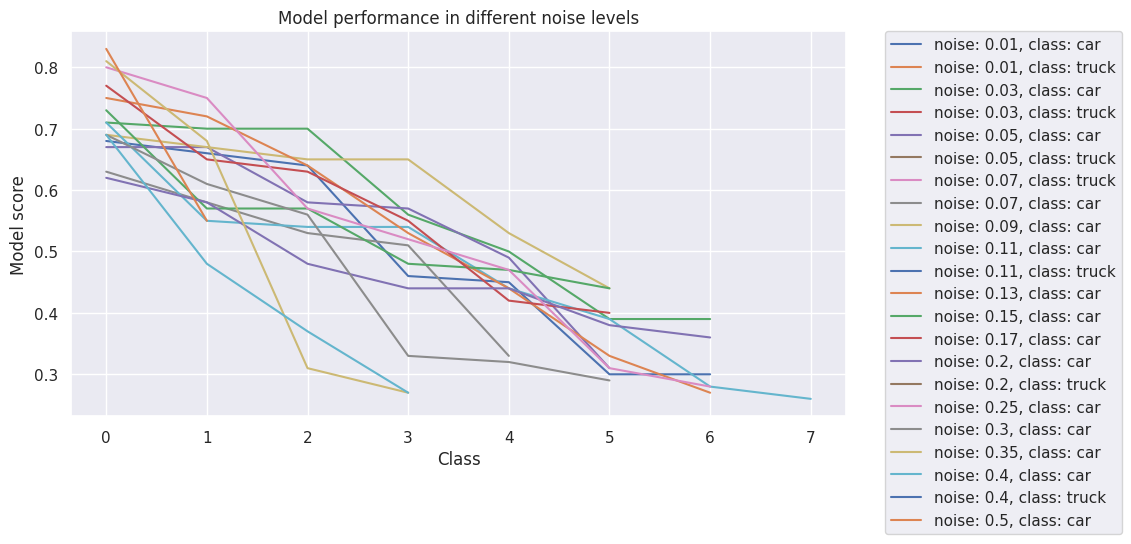

In [13]:
#plot model results
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 5))
for element in model_results:
    for class_name, class_scores in element["model_scores"].items():
        plt.plot(class_scores, label=f"noise: {element['noise']}, class: {class_name}")
#make legend smaller
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Model performance in different noise levels")
plt.xlabel("Class")
plt.ylabel("Model score")
#save plot
plt.savefig("../reports/model_performance_noise.png", bbox_inches='tight')



In [14]:
import pandas as pd
df = pd.DataFrame(model_results)
df.to_csv("../reports/model_results.csv", index=False)